In [1]:
from sklearn.model_selection import KFold
import random
import numpy as np
from sklearn.preprocessing import StandardScaler
import function
import matplotlib.pyplot as plt
import math
import tqdm
import optuna

In [2]:
p_1=50
p_2=50
n=150
r_J_or=10
r_1_or=10
r_2_or=10
r_prop=1.0
w_J=5.0
w_1=5.0
w_2=5.0
X1_erro=0.001
X2_erro=0.001
y_erro=0.001

## データの生成

In [3]:
X_1_al,X_2_al,y_al=function.gene_data(p_1,p_2,n,r_J_or,r_1_or,r_2_or,r_prop,w_J,w_1,w_2,X1_erro,X2_erro,y_erro)

In [4]:
X_1_original=X_1_al[:,:100]
X_2_original=X_2_al[:,:100]
y_original=y_al[:,:100]

X_1_test=X_1_al[:,100:150]
X_2_test=X_2_al[:,100:150]
y_test=y_al[:,100:150]

In [5]:
df_tra=np.row_stack((X_1_original,X_2_original,y_original))
df_tes=np.row_stack((X_1_test,X_2_test,y_test))

## 本当にこのデータが正しいのか検証

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
X=np.row_stack((X_1_original,X_2_original))
XT=X.T
yT=y_original.T
reg = LinearRegression().fit(XT, yT)

In [8]:
erro=np.linalg.norm(yT-XT.dot(reg.coef_.T),ord=2)**2
erro

2.0269271218691105

In [9]:
yT

array([[-5.85405304e-01],
       [ 5.74798314e-02],
       [-3.15238682e-01],
       [-1.08990718e-01],
       [ 2.08833353e-01],
       [-1.40557261e-01],
       [-1.05931827e-01],
       [-1.87253404e-01],
       [-6.65474891e-01],
       [-2.69952847e-01],
       [-1.14802097e-02],
       [-1.02535187e-03],
       [ 9.66650773e-02],
       [ 2.18421917e-01],
       [ 5.08273947e-01],
       [-3.57861369e-01],
       [-3.01322018e-01],
       [-2.87725353e-03],
       [-7.98575835e-02],
       [ 4.32696148e-01],
       [-5.25727039e-01],
       [ 1.29628049e-01],
       [ 1.88244558e-01],
       [-6.80931355e-01],
       [-2.57361181e-01],
       [-4.49614436e-01],
       [-1.95192412e-01],
       [-6.17382953e-01],
       [-7.43686780e-01],
       [-2.57260508e-01],
       [-2.87962338e-01],
       [-6.38405304e-01],
       [ 3.31280836e-01],
       [-3.53569538e-01],
       [-1.33399009e-01],
       [ 2.25088017e-01],
       [ 8.22939400e-02],
       [-4.13021784e-01],
       [-2.1

## W-sJIVE-decompositionを実装

### 分解

In [11]:
times=100
threshold=0.1
r_J=40
r_1=40
r_2=40


In [12]:
erro_lis,erro_best,S_J_best,U_1_best,U_2_best,S_1_best,W_1_best,S_2_best,W_2_best,sigma_J_best,sigma_1_best,sigma_2_best,hat_X_best=function.W_sJIVE_decompositon_1(
    times=times,r_J=r_J,r_1=r_1,r_2=r_2,X_1_or=X_1_original,X_2_or=X_2_original,threshold=threshold
)


  2%|▏         | 2/100 [00:00<00:04, 22.87it/s]


In [13]:
erro_lis

[461.3096556545572,
 617.8988765565349,
 617.1197955211347,
 617.1380384527499,
 616.728184689983,
 616.7619055842626,
 0.15068677833905122,
 2558.703165927566,
 2558.7064667867976,
 2558.709515728182,
 2558.6638754002706,
 2558.667551048768,
 0.055259236512575645]

In [14]:
X=np.row_stack((X_1_original,X_2_original))
X

array([[ 0.02109614, -0.3736289 ,  0.37443546, ...,  0.09120635,
        -0.15522169,  0.18616718],
       [-0.08093684, -0.00218063, -0.50057854, ...,  0.12327294,
         0.23094245, -0.18665605],
       [-0.09107212, -0.49050233, -0.38465181, ..., -0.43161308,
        -0.33745386, -0.13224536],
       ...,
       [ 0.22052834, -0.21000819, -0.05759824, ...,  0.25023366,
        -0.05475891,  0.6244729 ],
       [ 0.00232104,  0.06719086,  0.05910269, ..., -0.279626  ,
        -0.6530456 , -0.10649147],
       [ 0.41195189,  0.25004823,  0.16643902, ...,  0.00769651,
         0.28469325,  0.18174049]])

In [15]:
hat_X_best

array([[ 1.43337140e-02, -3.75340351e-01,  3.71208042e-01, ...,
         9.42636899e-02, -1.51146444e-01,  1.90084067e-01],
       [-7.46469812e-02, -1.10414353e-02, -4.85710491e-01, ...,
         1.22777196e-01,  2.21339573e-01, -2.02491868e-01],
       [-7.51479416e-02, -4.93890521e-01, -3.86485324e-01, ...,
        -4.61908500e-01, -3.41031645e-01, -1.30380526e-01],
       ...,
       [ 2.36814696e-01, -2.05635022e-01, -4.18124244e-02, ...,
         2.49218029e-01, -5.66817266e-02,  6.25065628e-01],
       [ 3.53185800e-03,  6.80483506e-02,  6.81175061e-02, ...,
        -2.76846391e-01, -6.39663435e-01, -1.05575459e-01],
       [ 3.99600367e-01,  2.64413303e-01,  1.64387314e-01, ...,
        -3.11458775e-04,  2.90516417e-01,  1.75515600e-01]])

### 最小二乗法で解いてみる

In [16]:
#最小二乗法では解けるので自分のコードのミス
erro_y_lis=[]
theta_1=theta_1_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=theta_21_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=theta_22_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
for l in range(10):
    theta_1=(y_original-theta_21.dot(S_1_best)-theta_22.dot(S_2_best)).dot(S_J_best.T).dot(np.linalg.inv(S_J_best.dot(S_J_best.T)))
    theta_21=(y_original-theta_1.dot(S_J_best)-theta_22.dot(S_2_best)).dot(S_1_best.T).dot(np.linalg.inv(S_1_best.dot(S_1_best.T)))
    theta_22=(y_original-theta_1.dot(S_J_best)-theta_21.dot(S_1_best)).dot(S_2_best.T).dot(np.linalg.inv(S_2_best.dot(S_2_best.T)))
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

In [17]:
erro_y_lis

[0.01152018951537879,
 0.010407068556299363,
 0.00996418833032752,
 0.009716003886430598,
 0.0095632076075806,
 0.009462738565590118,
 0.009392826955688499,
 0.009341720837877529,
 0.009302783868325627,
 0.009272117221197782]

### 回帰係数のスパース推定

In [18]:
times=100
threshold=0.001
lam_J=0.01
lam_1=0.001
lam_2=0.001
gamma=0

In [19]:
erro_y_lis,erro_best,theta_1_best,theta_21_best,theta_22_best,hat_y_best=function.W_sJIVE_decomposition_2(
    y_original,threshold,times,lam_J,lam_1,lam_2,gamma,S_J_best,S_1_best,S_2_best,sigma_J_best,sigma_1_best,sigma_2_best
)

100%|██████████| 100/100 [00:00<00:00, 565.12it/s]


In [20]:
erro_best

0.035218211907437

In [21]:
erro_y_lis

[0.045368934175958914,
 0.033359674898243236,
 0.03245402232980159,
 0.031970298418812805,
 0.0315423351940052,
 0.03144721997930415,
 0.03272647653592814,
 0.032937232601828854,
 0.03295587107211288,
 0.033395761653247084,
 0.033258491476034685,
 0.033377525712881835,
 0.033880046493500834,
 0.033715023651847705,
 0.03385442157898154,
 0.03418804065337352,
 0.03406287543981411,
 0.03415943519430571,
 0.034443644607228804,
 0.034368411677367317,
 0.03445394340282873,
 0.034641326967499005,
 0.0345896417189757,
 0.03464286404905927,
 0.03478544568682806,
 0.03475747458923214,
 0.03479515381788392,
 0.034889340883533335,
 0.03487159053144257,
 0.03489200989913167,
 0.03497146921871519,
 0.03496466071467396,
 0.03498496194445021,
 0.035040515091816694,
 0.0350246888103604,
 0.03503902149362847,
 0.035082304756898997,
 0.035075364713735055,
 0.03508888927291428,
 0.03512011943952298,
 0.03511271291630954,
 0.03512165546990776,
 0.035144949333643816,
 0.03513981722436399,
 0.035146738296010

In [23]:
y_original

array([[-5.85405304e-01,  5.74798314e-02, -3.15238682e-01,
        -1.08990718e-01,  2.08833353e-01, -1.40557261e-01,
        -1.05931827e-01, -1.87253404e-01, -6.65474891e-01,
        -2.69952847e-01, -1.14802097e-02, -1.02535187e-03,
         9.66650773e-02,  2.18421917e-01,  5.08273947e-01,
        -3.57861369e-01, -3.01322018e-01, -2.87725353e-03,
        -7.98575835e-02,  4.32696148e-01, -5.25727039e-01,
         1.29628049e-01,  1.88244558e-01, -6.80931355e-01,
        -2.57361181e-01, -4.49614436e-01, -1.95192412e-01,
        -6.17382953e-01, -7.43686780e-01, -2.57260508e-01,
        -2.87962338e-01, -6.38405304e-01,  3.31280836e-01,
        -3.53569538e-01, -1.33399009e-01,  2.25088017e-01,
         8.22939400e-02, -4.13021784e-01, -2.16035380e-01,
        -1.03670837e+00, -4.25145013e-01, -5.27188474e-01,
        -5.27022645e-01,  1.17254207e-02,  6.52097898e-02,
         9.08478529e-02,  1.73979449e-01, -2.57141861e-01,
        -3.58377587e-02, -4.10304081e-01,  7.13196350e-0

In [24]:
hat_y_best

array([-0.58705022,  0.05451162, -0.30467862, -0.09041311,  0.18581668,
       -0.13024211, -0.10335446, -0.190213  , -0.64656097, -0.30666091,
       -0.02204696,  0.00564755,  0.13962052,  0.24056495,  0.51228193,
       -0.33379134, -0.31636225,  0.02538505, -0.06491157,  0.42552204,
       -0.51588973,  0.12296749,  0.18464471, -0.66966183, -0.25727408,
       -0.42162377, -0.18488342, -0.60929626, -0.7403595 , -0.26219284,
       -0.30489136, -0.61767123,  0.35430394, -0.32151167, -0.1287588 ,
        0.19540795,  0.07348844, -0.42068588, -0.21314958, -1.05945431,
       -0.3757655 , -0.50012989, -0.52169403,  0.00469204,  0.02620326,
        0.08536717,  0.16671364, -0.2292115 , -0.02851321, -0.39405434,
        0.69431313, -0.30308476, -0.79932673, -0.11468638, -0.2305366 ,
        0.3160375 , -0.2434857 , -0.7641769 , -0.74553711, -0.2981797 ,
       -0.51599072, -0.78258583, -0.07129019, -0.4801715 , -0.42556137,
       -0.13525067, -0.31834611,  0.19552881,  0.31249202, -0.24

<function matplotlib.pyplot.show(close=None, block=None)>

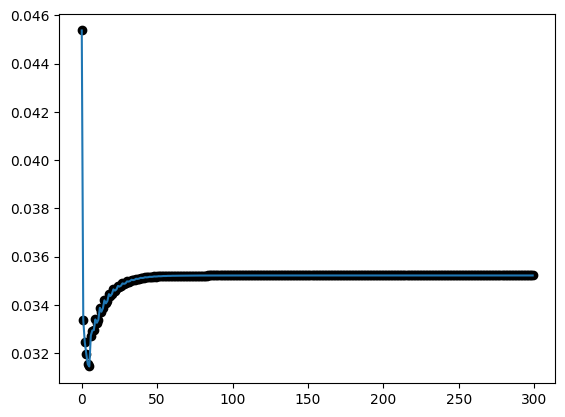

In [25]:
plt.plot(erro_y_lis)
plt.scatter(range(len(erro_y_lis)),erro_y_lis,color="black")
plt.show

### 非ゼロの係数のみを残す

In [26]:
theta_1_best

array([ 0.08039532, -0.03100526,  0.00182704, -0.06298138, -0.15527392,
        0.08992492,  0.10002758, -0.14933919,  0.02079624,  0.0169161 ,
       -0.08590838, -0.07312483, -0.05023824,  0.29835555, -0.13090565,
        0.05782476,  0.26608498, -0.09529091,  0.07624428, -0.14560131,
        0.31761064,  0.35035023,  0.31265015, -0.04148221, -0.13191669,
       -0.17727011,  0.24849901,  0.00998813,  0.12093115,  0.0779991 ,
        0.06291835, -0.83191694,  0.09155816,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [41]:
nonzero_theta_1 = np.nonzero(theta_1_best)[0]
theta_1_best_sparse=theta_1_best[nonzero_theta_1]
theta_1_best_sparse.shape

(33,)

In [28]:
U_1_best_sparse=U_1_best[:,nonzero_theta_1]
U_1_best_sparse.shape

(50, 33)

In [29]:
U_2_best_sparse=U_2_best[:,nonzero_theta_1]
U_2_best_sparse.shape

(50, 33)

In [30]:
S_J_best_sparse=S_J_best[nonzero_theta_1,:]
S_J_best_sparse.shape

(33, 100)

In [42]:
nonzero_theta_21 = np.nonzero(theta_21_best)[0]
theta_21_best_sparse=theta_21_best[nonzero_theta_21]
theta_21_best_sparse.shape

(13,)

In [32]:
W_1_best_sparse=W_1_best[:,nonzero_theta_21]
W_1_best_sparse.shape

(50, 13)

In [34]:
S_1_best_sparse=S_1_best[nonzero_theta_21,:]
S_1_best_sparse.shape

(13, 100)

In [43]:
nonzero_theta_22 = np.nonzero(theta_22_best)[0]
theta_22_best_sparse=theta_22_best[nonzero_theta_22]
theta_22_best_sparse.shape

(9,)

In [36]:
W_2_best_sparse=W_2_best[:,nonzero_theta_22]
W_2_best_sparse.shape

(50, 9)

In [37]:
S_2_best_sparse=S_2_best[nonzero_theta_22,:]
S_2_best_sparse.shape

(9, 100)

### パラメータチューニング用の予測を行う

In [44]:
erro_tes_lis,erro_tes_best,S_J_new_best,S_1_new_best,S_2_new_best,y_new,erro_result=function.sJIVE_prediction(
    X_1_tes=X_1_test,X_2_tes=X_2_test,y_tes=y_test,U_1_best=U_1_best_sparse,U_2_best=U_2_best_sparse,W_1_best=W_1_best_sparse,W_2_best=W_2_best_sparse,theta_1_best=theta_1_best_sparse,theta_21_best=theta_21_best_sparse,theta_22_best=theta_22_best_sparse,times_tes=100,threshold_tes=0.01
)

100%|██████████| 100/100 [00:00<00:00, 6880.98it/s]


In [45]:
erro_tes_lis

[3.3362253587213124,
 1.9346284462460344,
 0.985763725499966,
 0.5894164086712328,
 0.5151827496261272,
 0.46814270416891374,
 0.41943225430955966,
 0.4053581694174543,
 0.39678361852861554,
 0.3852758320889899,
 0.38150278739843857,
 0.3790744741434614,
 0.3755918713411194,
 0.37438663230049696,
 0.37357694230502353,
 0.3723854637624431,
 0.37196143688814437,
 0.3716694716210569,
 0.3712340129909356,
 0.3710767518644175,
 0.37096676074834456,
 0.3708015998429257,
 0.3707415358636261,
 0.3706989793634281,
 0.370634945264674,
 0.3706116032384228,
 0.37059485153064425,
 0.3705696771822522,
 0.3705605051497979,
 0.37055383370562334,
 0.37054384303509136,
 0.370540211321829,
 0.37053753249071847,
 0.3705335406886333,
 0.3705320945079319,
 0.37053101242391995,
 0.3705294093127166,
 0.3705288308490496,
 0.37052839179973474,
 0.3705277453897532,
 0.3705275131519722,
 0.37052733439944796,
 0.3705270728945673,
 0.37052697936258355,
 0.37052690638986363,
 0.37052680030604357,
 0.3705267625323312

## テスト広場

In [84]:
lam_J=1.0
lam_1=0.001
lam_2=0.001
gamma=0
#(j=0,1,...,r_J)

In [85]:
erro_y_lis=[]
theta_1=theta_1_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_J))
theta_21=theta_21_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_1))
theta_22=theta_22_best=np.random.uniform(low=-0.1, high=0.1, size=int(r_2))
for l in range(100):
    #pcLassoの対角行列を作成
    pcLasso_sigma_J=[]
    for i in range(len(sigma_J_best)):
        a_i=sigma_J_best[0]**2-sigma_J_best[i]**2
        pcLasso_sigma_J.append(a_i)
    diag_sigma_J_final=np.diag(pcLasso_sigma_J)
    diag_sigma_J_final_r_J=diag_sigma_J_final[:r_J,:r_J]

    pcLasso_sigma_1=[]
    for i in range(len(sigma_1_best)):
        a_i=sigma_1_best[0]**2-sigma_1_best[i]**2
        pcLasso_sigma_1.append(a_i)
    diag_sigma_1_final=np.diag(pcLasso_sigma_1)
    diag_sigma_1_final_r_1=diag_sigma_1_final[:r_1,:r_1]

    pcLasso_sigma_2=[]
    for i in range(len(sigma_2_best)):
        a_i=sigma_2_best[0]**2-sigma_2_best[i]**2
        pcLasso_sigma_2.append(a_i)
    diag_sigma_2_final=np.diag(pcLasso_sigma_2)
    diag_sigma_2_final_r_2=diag_sigma_2_final[:r_2,:r_2]

    #theta_1を更新
    for j in range(r_J):
        theta_1_del_j=np.delete(theta_1,j)
        S_J_best_del_j=np.delete(S_J_best,j,axis=0)
        S_J_best_j=S_J_best[j]
        z=(y_original-theta_21.dot(S_1_best)-theta_22.dot(S_2_best)-theta_1_del_j.dot(S_J_best_del_j)).dot(S_J_best_j.T)
        if z>lam_J:
            theta_1[j]=(z-lam_J)/(np.linalg.norm(S_J_best_j,ord=2)**2)
        elif np.absolute(z)<=lam_J:
            theta_1[j]=0
        else:
            theta_1[j]=(z+lam_J)/(np.linalg.norm(S_J_best_j,ord=2)**2)



    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

    #theta_21を更新
    for j in range(r_1):
        theta_21_del_j=np.delete(theta_21,j)
        S_1_best_del_j=np.delete(S_1_best,j,axis=0)
        S_1_best_j=S_1_best[j]
        z=(y_original-theta_1.dot(S_J_best)-theta_22.dot(S_2_best)-theta_21_del_j.dot(S_1_best_del_j)).dot(S_1_best_j.T)
        if z>lam_1:
            theta_21[j]=(z-lam_1)/(np.linalg.norm(S_1_best_j,ord=2)**2+gamma*diag_sigma_1_final_r_1[j,j])
        elif np.absolute(z)<=lam_1:
            theta_21[j]=0
        else:
            theta_21[j]=(z+lam_1)/(np.linalg.norm(S_1_best_j,ord=2)**2+gamma*diag_sigma_1_final_r_1[j,j])

    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

    #theta_22を更新
    for j in range(r_2):
        theta_22_del_j=np.delete(theta_22,j)
        S_2_best_del_j=np.delete(S_2_best,j,axis=0)
        S_2_best_j=S_2_best[j]
        z=(y_original-theta_1.dot(S_J_best)-theta_21.dot(S_1_best)-theta_22_del_j.dot(S_2_best_del_j)).dot(S_2_best_j.T)
        if z>lam_2:
            theta_22[j]=-(z-lam_2)/(np.linalg.norm(S_2_best_j,ord=2)**2+gamma*diag_sigma_2_final_r_2[j,j])
        elif np.absolute(z)<=lam_2:
            theta_22[j]=0
        else:
            theta_22[j]=(z+lam_2)/(np.linalg.norm(S_2_best_j,ord=2)**2+gamma*diag_sigma_2_final_r_2[j,j])

    #誤差をとる
    hat_y=theta_1.dot(S_J_best)+theta_21.dot(S_1_best)+theta_22.dot(S_2_best)
    erro=np.linalg.norm(y_original-hat_y,ord=2)**2
    erro_y_lis.append(erro)

In [86]:
erro_y_lis

[1.180689302434097,
 1.1500635705903877,
 1.150444071476731,
 1.1522481627171597,
 1.1492425939879125,
 1.1489214406890114,
 1.149152605207301,
 1.1490227408597071,
 1.1490426073381153,
 1.149619933914947,
 1.1495868394722397,
 1.1495694507133962,
 1.1498381888011233,
 1.1500171183434653,
 1.150024711792463,
 1.150027937563656,
 1.150093173896041,
 1.150047208097193,
 1.1500725599135557,
 1.1500956137551002,
 1.1501133472575187,
 1.1501433684653937,
 1.1501196553126094,
 1.1501048950592745,
 1.1501309708720757,
 1.1501244087986604,
 1.1501194100959842,
 1.150107057559982,
 1.150110394458781,
 1.150110685090219,
 1.1501339921019011,
 1.1501289226434919,
 1.150118121043688,
 1.150089781489033,
 1.1501015353793735,
 1.150102810020176,
 1.1501299829272098,
 1.1501284926108353,
 1.1501185747542602,
 1.150090371969414,
 1.1500994721501285,
 1.1501014932560387,
 1.1501246791831656,
 1.1501245565200138,
 1.1501170689298932,
 1.150095555096449,
 1.1501019821672949,
 1.1501037925932533,
 1.15012

<function matplotlib.pyplot.show(close=None, block=None)>

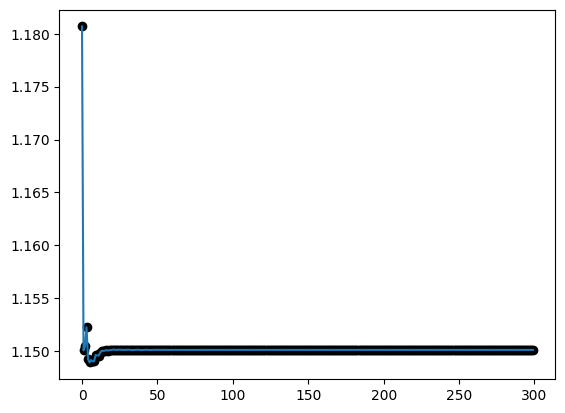

In [87]:
plt.plot(erro_y_lis)
plt.scatter(range(len(erro_y_lis)),erro_y_lis,color="black")
plt.show

In [88]:
theta_1

array([ 0.05123244,  0.21120311, -0.03056201,  0.        , -0.0825378 ,
       -0.00996745, -0.11545755,  0.00231046,  0.16151542, -0.20438591,
        0.17587973,  0.01330369,  0.        , -0.05405301,  0.07145153,
        0.04051003,  0.        ,  0.        , -0.13833197,  0.        ,
        0.        ,  0.        ,  0.14603287,  0.        ,  0.        ,
        0.        ,  0.        , -0.03281539,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [89]:
theta_21

array([ 0.        ,  0.11131884,  0.        ,  0.31693071,  0.        ,
        0.29120397,  0.        ,  0.12867229,  0.52926681,  0.0218962 ,
        0.        ,  0.08793252, -0.29574765,  0.        , -0.20577262,
        0.10414683,  0.23922591, -0.25982112,  0.        ,  0.        ,
       -0.26305251,  0.        ,  0.15634289,  0.        ,  0.14958489,
        0.        ,  0.        ,  0.14843874, -0.28434528, -0.13296656,
       -0.35570612,  0.        , -0.19926241,  0.        ,  0.        ,
        0.08975083, -0.29224076,  0.        ,  0.        , -0.0154694 ])

In [90]:
theta_22

array([ 0.00000000e+00, -2.91925175e-12,  0.00000000e+00, -2.00539501e-12,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -3.02303997e-02, -5.09256503e-12,
        0.00000000e+00, -8.86264230e-02,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.51538168e-12,  0.00000000e+00, -6.21063398e-02, -1.56509578e-12,
       -2.38409923e-04, -4.19130340e-02, -5.95110542e-04,  0.00000000e+00,
       -1.51358670e-04,  0.00000000e+00,  0.00000000e+00, -2.77157845e-12,
       -1.13029871e-03,  0.00000000e+00,  0.00000000e+00, -1.30745106e-12])

<function matplotlib.pyplot.show(close=None, block=None)>

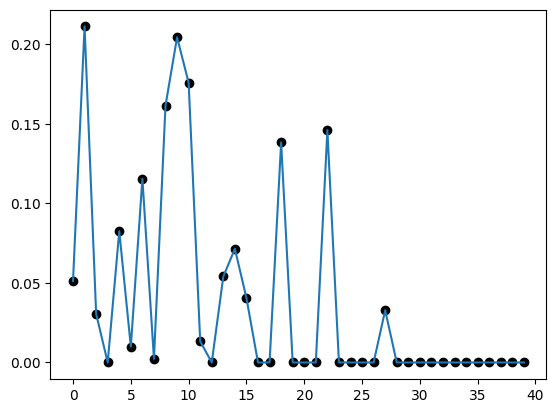

In [91]:
plt.plot(np.absolute(theta_1))
plt.scatter(range(len(theta_1)),np.absolute(theta_1),color="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

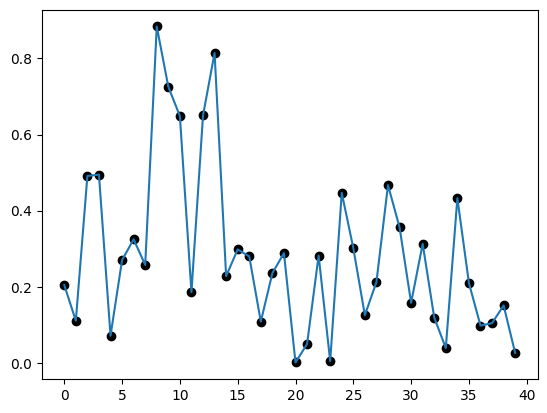

In [62]:
plt.plot(np.absolute(theta_21))
plt.scatter(range(len(theta_21)),np.absolute(theta_21),color="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

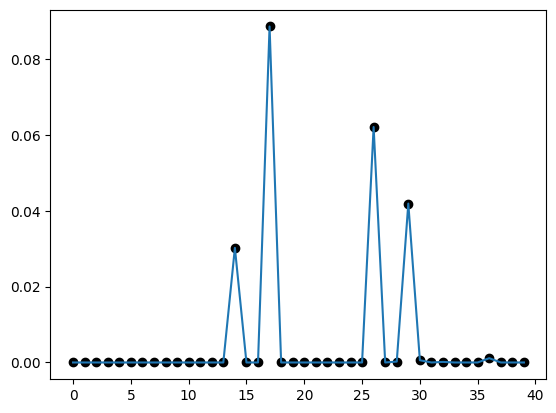

In [93]:
plt.plot(np.absolute(theta_22))
plt.scatter(range(len(theta_22)),np.absolute(theta_22),color="black")
plt.show

In [ ]:
theta_1_del_j=np.delete(theta_1,j)
S_J_best_del_j=np.delete(S_J_best,j,axis=0)
S_J_best_j=S_J_best[j]

In [42]:
S_J_best

array([[ 2.72888248e+00,  3.31787949e+00,  2.46493542e+00, ...,
         2.45960637e+00,  2.88358910e+00,  2.04330008e+00],
       [-4.08221182e-01,  1.89048705e+00, -6.68969952e-01, ...,
        -3.64775919e-01,  1.01346155e+00, -2.46112373e-01],
       [-2.64411253e-01,  5.98335664e-02, -6.14434190e-01, ...,
        -2.24623455e-01,  1.43356130e-01,  1.79692324e-01],
       ...,
       [-1.10637652e-02,  3.10750482e-02, -4.03260996e-03, ...,
         5.33046856e-03, -9.12227569e-03, -2.20904068e-02],
       [-3.67050318e-02, -2.58426797e-03, -2.32908202e-03, ...,
         2.63756270e-02, -2.17371867e-02, -3.23724277e-02],
       [-7.41970466e-04,  1.08945909e-02,  1.95582739e-02, ...,
        -1.35940669e-02, -9.26236613e-03, -4.74493719e-03]])

In [46]:
S_J_best_j=S_J_best[0]
S_J_best_j.shape

(100,)

In [49]:
np.linalg.norm(S_J_best_j,ord=2)**2

642.4561179275595

In [50]:
S_J_best_j.dot(S_J_best_j.T)

642.4561179275595

In [41]:
for j in range(r_J):
    print(j)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [48]:
(y_original-theta_21.dot(S_1_best)-theta_22.dot(S_2_best)-theta_1_del_j.dot(S_J_best_del_j)).dot(S_J_best_j)

array([5.62063886e-08])